In [1]:
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
undirected = ['RelatedTo','SimilarTo','Antonym','Synonym','DistinctFrom','EtymologicallyRelatedTo']

In [3]:
def readcsv():
    G={}
    
    with open('G','rt',encoding="utf8") as file:
        print('start')
        totalRelations=0
        totalItems=0
        for i,row in enumerate(file):
            totalRelations+=1
            if (len(row.split()) != 3):
                continue
            item1,item2,rel = row.split()
            #print(item1)
            if item1 in G:
                G[item1][0] += [item2]  #edge
                G[item1][1] += [rel]    #label
                G[item1][2] += 1        #degree
            else:
                G[item1] = [[item2],[rel],1]
                totalItems+=1
            if rel in undirected:
                if item2 in G:
                    G[item2][0] += [item2]  #edge
                    G[item2][1] += [rel]    #label
                    G[item2][2] += 1        #degree
                else:
                    G[item2] = [[item1],[rel],1]
        #print(G)   
        print(totalItems)
        print(totalRelations)
        print('done creating graph')
        return G

In [4]:
def plotHist(G):
    Hist = {}
    for item in G:
        if G[item][2] not in Hist:
            Hist[G[item][2]] = 1
        else:
            Hist[G[item][2]] +=1
        if G[item][2] > 1500:
            print(item, G[item][2])
    xAxis = list(Hist.keys())
    yAxis = list(Hist.values())
    plt.scatter(xAxis,yAxis)

    plt.show()

start
491567
3391306
done creating graph
oxygen 2880
language 1840
person 2566
people 2676
water 2136
fish 1590
hydrogen 2109
mineral 3952
cell 1608
drug 2884
genus 1675
plant 2375
iron 1662


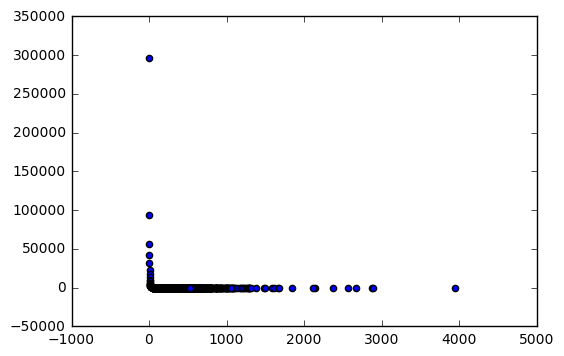

In [5]:
G = readcsv()
plotHist(G)

In [6]:
plant = G['mineral']
relCounts = Counter(plant[1])
adjCounts = Counter(plant[0])
print(relCounts)

Counter({'RelatedTo': 3927, 'IsA': 7, 'UsedFor': 7, 'AtLocation': 5, 'Synonym': 2, 'SimilarTo': 2, 'NotHasProperty': 1, 'HasProperty': 1})


In [7]:
next={}
for v in G:
    if 'mineral' in G[v][0]:
        for i in range(len(G[v][0])):
            item = G[v][0][i]
            rel = G[v][1][i]
            name = rel+' '+item
            if name in next:
                next[name]+=1
            else:
                next[name]=1
print(Counter(next))

Counter({'RelatedTo mineral': 7788, 'RelatedTo oxygen': 2268, 'RelatedTo iron': 2207, 'RelatedTo hydrogen': 1601, 'RelatedTo sulfur': 1581, 'RelatedTo animal': 1240, 'RelatedTo copper': 1204, 'RelatedTo salt': 1174, 'RelatedTo magnesium': 1117, 'IsA mineral': 1052, 'RelatedTo lead': 1029, 'RelatedTo metal': 884, 'RelatedTo arsenic': 876, 'RelatedTo species': 851, 'RelatedTo calcium': 801, 'RelatedTo silicon': 740, 'RelatedTo potassium': 704, 'RelatedTo rock': 669, 'RelatedTo material': 606, 'RelatedTo aluminum': 595, 'RelatedTo molecule': 571, 'RelatedTo sodium': 566, 'RelatedTo silver': 541, 'RelatedTo manganese': 483, 'RelatedTo sugar': 477, 'RelatedTo antimony': 475, 'RelatedTo stone': 409, 'RelatedTo crystal': 406, 'RelatedTo bismuth': 364, 'RelatedTo phosphorus': 363, 'RelatedTo oil': 362, 'RelatedTo glass': 348, 'RelatedTo gold': 345, 'RelatedTo vegetable': 338, 'RelatedTo ore': 323, 'RelatedTo tin': 306, 'RelatedTo silicate': 269, 'RelatedTo tellurium': 268, 'RelatedTo chlorine'

In [8]:
target = sorted(next,key=next.get)[-2]
print('Is it ' + target + '?')

Is it RelatedTo oxygen?


In [9]:
def findCommonMatch(G,guess,ag):
    next = {}
    numItems = 0
    for v in G:
        if guess in G[v][0]:
            
            #validate this potential guess against previous guesses
            overallValid = 1
            for j in ag:
                #a potential guess must relate to every previous answer 
                #(change to ~90% of previous answers?)
                valid = 0
                for i in range(len(G[v][0])):
                    if G[v][0][i] == j.split()[1] and G[v][1][i] == j.split()[0]:
                        valid = 1
                if valid == 0:
                    overallValid = 0
                    break
            if overallValid == 0:
                continue
                
            numItems += 1
            for i in range(len(G[v][0])):
                item = G[v][0][i]
                rel = G[v][1][i]
                name = rel+' '+item
                if name in next:
                    next[name]+=1
                else:
                    next[name]=1
                if rel in undirected:
                    next[name]-=0.9 
                    #because RelatedTo sucks, but maybe we could 
                    #make this generic, like try not to ask the same type
                    #of relation within 5 questions
                    
    print('Valid items: ' + str(numItems))
    if len(next) == 0:
        return 'not found error'
    for item in reversed(sorted(next,key=next.get)):
        if item not in ag:
            if numItems < 2:
                print('Final answer: ' + item.split()[1])
                return 'f'
            return item

In [10]:
def playGame(G,mostCommon):
    allGuesses = [mostCommon]
    currentGuess = mostCommon
    Input = [1,0,1,1,0,0]
    while True:
        print('Is it ' + currentGuess + '?')
        answer = Input[0]
        print('Yes')
        if answer == 1:
            currentGuess = findCommonMatch(G,currentGuess.split()[1],allGuesses)
            if currentGuess == 'f':
                break
            allGuesses.append(currentGuess)
        else:
            #create second allGuesses list for negative guesses,
            #evaluate potential guesses as not that list
            break

In [11]:
mostCommon = 'IsA dog'
playGame(G,mostCommon)

Is it IsA dog?
Yes
Valid items: 172
Is it IsA terrier?
Yes
Valid items: 28
Is it IsA toy_dog?
Yes
Valid items: 2
Is it UsedFor mop_floor?
Yes
Valid items: 1
Final answer: shih_tzu
